In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from numpy import random
import matplotlib.pyplot as plt

In [2]:
random.seed(123)

In [3]:
df = pd.read_csv('../data/full_dataset.csv', parse_dates=['timestamp'], index_col=0)
df.head()

c:\users\yalex\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,timestamp,electricity,building_name,weather_file,industry,area,primary_space_usage,TemperatureC,year,month,...,hour_21,hour_22,hour_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
9,2015-01-01 07:00:00,27.79,Office_Abbey,weather0.csv,Education,6891.54454,Office,2.8,2015,1,...,0,0,0,0,0,0,1,0,0,0
105,2015-01-01 08:00:00,27.66,Office_Abbey,weather0.csv,Education,6891.54454,Office,2.8,2015,1,...,0,0,0,0,0,0,1,0,0,0
201,2015-01-01 09:00:00,27.13,Office_Abbey,weather0.csv,Education,6891.54454,Office,3.9,2015,1,...,0,0,0,0,0,0,1,0,0,0
297,2015-01-01 10:00:00,27.34,Office_Abbey,weather0.csv,Education,6891.54454,Office,5.0,2015,1,...,0,0,0,0,0,0,1,0,0,0
393,2015-01-01 11:00:00,27.34,Office_Abbey,weather0.csv,Education,6891.54454,Office,5.6,2015,1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
def stratified_split(df, features):
    '''
    df: the input dataframe to be split
    features: features to be used in stratified splitting
    return train-test split using stratified splitting
    '''
    p = 0.2 #portion of test set
    sss = StratifiedShuffleSplit(n_splits=1, test_size=p)
    building_profiles = (df.groupby('building_name').first())[features]
    X = df['building_name'].unique()
    y = building_profiles.reset_index(drop=True)
    for train_index, test_index in sss.split(X, y):
        train_buildings = X[train_index]
        test_buildings = X[test_index]
    train = df[df['building_name'].isin(train_buildings)]
    test = df[df['building_name'].isin(test_buildings)]
    return train, test

In [5]:
df = df.dropna()

In [6]:
df = df.drop(['year'], axis=1)

In [7]:
one_hot = pd.get_dummies(df[['weather_file', 'industry', 'primary_space_usage']])

In [8]:
df = pd.concat([df, one_hot], axis=1)

In [9]:
df.columns

Index(['timestamp', 'electricity', 'building_name', 'weather_file', 'industry',
       'area', 'primary_space_usage', 'TemperatureC', 'month', 'date',
       ...
       'weather_file_weather8.csv', 'weather_file_weather9.csv',
       'industry_Commercial Property', 'industry_Education',
       'industry_Government', 'primary_space_usage_Office',
       'primary_space_usage_PrimClass', 'primary_space_usage_UnivClass',
       'primary_space_usage_UnivDorm', 'primary_space_usage_UnivLab'],
      dtype='object', length=132)

In [10]:
features = ['industry']
train, test = stratified_split(df, features)

In [11]:
train_dist = pd.DataFrame(train.groupby('weather_file').size()/len(train))
train_dist = train_dist.reset_index()
train_dist

,weather_file,0
0,weather0.csv,0.194623
1,weather1.csv,0.187555
2,weather10.csv,0.009991
3,weather11.csv,0.007591
4,weather12.csv,0.004915
5,weather13.csv,0.007576
6,weather14.csv,0.004871
7,weather15.csv,0.007030
8,weather16.csv,0.004816
9,weather18.csv,0.005056


In [12]:
test_dist = pd.DataFrame(test.groupby('weather_file').size()/len(test))
test_dist = test_dist.reset_index()
test_dist

,weather_file,0
0,weather0.csv,0.189058
1,weather1.csv,0.149666
2,weather12.csv,0.009675
3,weather14.csv,0.009588
4,weather17.csv,0.019807
5,weather19.csv,0.009712
6,weather2.csv,0.185356
7,weather20.csv,0.009961
8,weather3.csv,0.119172
9,weather37.csv,0.009249


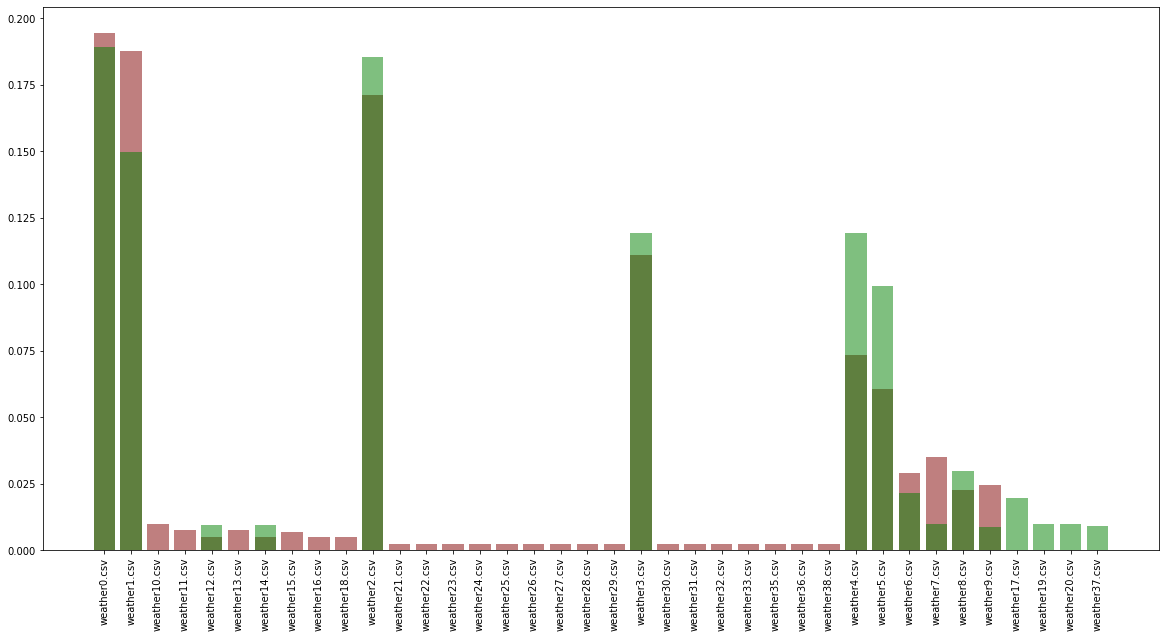

In [13]:
plt.figure(figsize=(20,10))
plt.bar(x=train_dist['weather_file'], height=train_dist[0], label='train', fc=(0.5, 0, 0, 0.5))
plt.xticks(rotation='vertical')
plt.bar(x=test_dist['weather_file'], height=test_dist[0], label='test', fc=(0, 0.5, 0, 0.5))
plt.xticks(rotation='vertical');

In [17]:
train.to_csv('../data/train.csv')

In [18]:
test.to_csv('../data/test.csv')

In [19]:
df.columns.tolist()

['timestamp',
 'electricity',
 'building_name',
 'weather_file',
 'industry',
 'area',
 'primary_space_usage',
 'TemperatureC',
 'month',
 'date',
 'hour',
 'weekday',
 'month_1',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_10',
 'month_11',
 'month_12',
 'date_1',
 'date_2',
 'date_3',
 'date_4',
 'date_5',
 'date_6',
 'date_7',
 'date_8',
 'date_9',
 'date_10',
 'date_11',
 'date_12',
 'date_13',
 'date_14',
 'date_15',
 'date_16',
 'date_17',
 'date_18',
 'date_19',
 'date_20',
 'date_21',
 'date_22',
 'date_23',
 'date_24',
 'date_25',
 'date_26',
 'date_27',
 'date_28',
 'date_29',
 'date_30',
 'date_31',
 'hour_0',
 'hour_1',
 'hour_2',
 'hour_3',
 'hour_4',
 'hour_5',
 'hour_6',
 'hour_7',
 'hour_8',
 'hour_9',
 'hour_10',
 'hour_11',
 'hour_12',
 'hour_13',
 'hour_14',
 'hour_15',
 'hour_16',
 'hour_17',
 'hour_18',
 'hour_19',
 'hour_20',
 'hour_21',
 'hour_22',
 'hour_23',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 '

In [25]:
train_light = train.drop(['date',
 'hour',
 'month',
 'weekday',
 'primary_space_usage',
 'TemperatureC',
 'date', 
 'date_1',
 'date_2',
 'date_3',
 'date_4',
 'date_5',
 'date_6',
 'date_7',
 'date_8',
 'date_9',
 'date_10',
 'date_11',
 'date_12',
 'date_13',
 'date_14',
 'date_15',
 'date_16',
 'date_17',
 'date_18',
 'date_19',
 'date_20',
 'date_21',
 'date_22',
 'date_23',
 'date_24',
 'date_25',
 'date_26',
 'date_27',
 'date_28',
 'date_29',
 'date_30',
 'date_31',], axis=1)

In [26]:
test_light = test.drop(['date',
 'hour',
 'month',
 'weekday',
 'primary_space_usage',
 'TemperatureC',
 'date', 
 'date_1',
 'date_2',
 'date_3',
 'date_4',
 'date_5',
 'date_6',
 'date_7',
 'date_8',
 'date_9',
 'date_10',
 'date_11',
 'date_12',
 'date_13',
 'date_14',
 'date_15',
 'date_16',
 'date_17',
 'date_18',
 'date_19',
 'date_20',
 'date_21',
 'date_22',
 'date_23',
 'date_24',
 'date_25',
 'date_26',
 'date_27',
 'date_28',
 'date_29',
 'date_30',
 'date_31',], axis=1)

In [27]:
train_light.to_csv('../data/train_light.csv')

In [28]:
test_light.to_csv('../data/test_light.csv')